# Retrospective analysis of secondary amine generality

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import re
import os
import ast
from pypdf import PdfReader
from collections import Counter

# #1. Get publication data over years

In [2]:
results_dict = {}
directory = "../data/literature_search/"
year_pattern = r'\((\d{4})\)'

for file in os.listdir(directory):
    if file.endswith(".pdf"):
        print(f"Processing {file}")
        reader = PdfReader(os.path.join(directory, file))
        text = ""
        for page in tqdm(reader.pages, desc=f"Reading {file}"):
            text += page.extract_text() + "\n"

        years = re.findall(year_pattern, text)
        year_list = [ast.literal_eval(year) for year in years]
        results_dict[file.replace(".pdf","")] = Counter(year_list)

        


Processing Amine10.pdf


Reading Amine10.pdf: 100%|██████████| 4/4 [00:00<00:00,  5.15it/s]


Processing Proline_first500.pdf


Reading Proline_first500.pdf: 100%|██████████| 238/238 [02:24<00:00,  1.65it/s]


Processing Amine13.pdf


Reading Amine13.pdf: 100%|██████████| 2/2 [00:00<00:00,  8.42it/s]


Processing Amine12.pdf


Reading Amine12.pdf: 100%|██████████| 5/5 [00:01<00:00,  4.77it/s]


Processing TetrazoleDerivedAmine.pdf


Reading TetrazoleDerivedAmine.pdf: 100%|██████████| 62/62 [00:20<00:00,  2.96it/s]


Processing Amine8.pdf


Reading Amine8.pdf: 100%|██████████| 2/2 [00:00<00:00,  9.43it/s]


Processing Amine9.pdf


Reading Amine9.pdf: 100%|██████████| 3/3 [00:00<00:00,  5.71it/s]


Processing Amine17.pdf


Reading Amine17.pdf: 100%|██████████| 2/2 [00:00<00:00,  8.15it/s]


Processing Amine14.pdf


Reading Amine14.pdf: 100%|██████████| 3/3 [00:00<00:00,  9.49it/s]


Processing Amine19.pdf


Reading Amine19.pdf: 100%|██████████| 7/7 [00:01<00:00,  4.99it/s]


Processing Amine25.pdf


Reading Amine25.pdf: 100%|██████████| 50/50 [00:14<00:00,  3.48it/s]


Processing Amine7.pdf


Reading Amine7.pdf: 100%|██████████| 10/10 [00:02<00:00,  4.59it/s]


Processing Amine6.pdf


Reading Amine6.pdf: 100%|██████████| 209/209 [01:58<00:00,  1.76it/s]


Processing Amine24.pdf


Reading Amine24.pdf: 100%|██████████| 5/5 [00:00<00:00,  5.66it/s]


Processing Amine18.pdf


Reading Amine18.pdf: 100%|██████████| 2/2 [00:00<00:00,  9.00it/s]


Processing Amine4.pdf


Reading Amine4.pdf: 100%|██████████| 3/3 [00:00<00:00,  6.83it/s]


Processing BenzimidazoleDerivedAmine.pdf


Reading BenzimidazoleDerivedAmine.pdf: 100%|██████████| 4/4 [00:00<00:00,  5.86it/s]


Processing Amine5.pdf


Reading Amine5.pdf: 100%|██████████| 14/14 [00:03<00:00,  4.52it/s]


Processing Amine1.pdf


Reading Amine1.pdf: 100%|██████████| 88/88 [00:31<00:00,  2.82it/s]


Processing Amine20.pdf


Reading Amine20.pdf: 100%|██████████| 7/7 [00:01<00:00,  4.80it/s]


Processing Amine2.pdf


Reading Amine2.pdf: 100%|██████████| 74/74 [00:25<00:00,  2.96it/s]


Processing Amine3.pdf


Reading Amine3.pdf: 100%|██████████| 6/6 [00:01<00:00,  4.50it/s]


Processing Amine11_first500.pdf


Reading Amine11_first500.pdf: 100%|██████████| 251/251 [02:43<00:00,  1.53it/s]


Processing Amine21.pdf


Reading Amine21.pdf: 100%|██████████| 18/18 [00:04<00:00,  4.49it/s]


In [3]:
plot_results = {}
for key in results_dict:
    values = []
    total = 0
    for year in range(2000, 2024):
        total += results_dict[key][year]
        values.append(total)
    plot_results[key] = values



In [5]:
plt.rcParams["font.family"] = "Arial"
plt.rcParams["font.size"] = 12
hist_results = {}
for key in plot_results:
    if max(plot_results[key]) < 50:
        pass

    else:
        hist_results[key] = plot_results[key][5]
        plt.scatter(range(2000, 2024), plot_results[key], label=key, s=20)


plt.xlabel("Year")
plt.ylabel("Literature Reports")
plt.ylim(0,380)
plt.xlim(2000,2024)
plt.legend(loc='upper left', bbox_to_anchor=(-0.04, 1.15), ncol=4,fontsize=10, frameon=False)
plt.show()


In [6]:
plt.bar(hist_results.keys(), hist_results.values(), color='#008081')
plt.xticks(range(len(hist_results)), hist_results.keys(), rotation=45)
plt.ylim(0,30)
plt.ylabel("Literature Reports in 2005")
plt.show()

# #2 Retrospective evaluation

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold
from sklearn.pipeline import Pipeline
import xgboost as xgb
import umap
import common_functions
# key for citation year
year_key = {1:2005, 2:2006, 3:2000, 4:2002, 5:2002, 6:2005, 7:2002, 8:2003, 9:2003, 10:2005, 11:2004, 12:2005, 13:2005, 14:2012, 15:2004, 16:2005, 17:2002, 18:2004, 19:2005, 20:2003, 21:2003, 22:2007, 23:2005, 24:2004, 25:2005, 26:2003, 27:2004, 28:2005, 29:2004, 30:2005}

/Users/isaiahbetinol/opt/anaconda3/envs/amine_generality/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


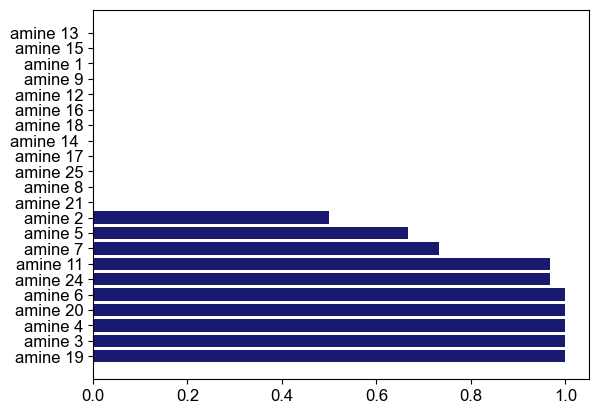

In [9]:
original_df = pd.read_excel('../data/dataset.xlsx',sheet_name='iminium')
original_df['Citation'] = original_df['Citation'].map(year_key)

YEAR = 2005
df = original_df[original_df['Citation'] <= YEAR]
X,y = df.iloc[:,11:], df['DDG']


xgbpipe = Pipeline([('scaler', StandardScaler()), ('xgb', xgb.XGBRegressor())])
model = xgbpipe.set_params(xgb__eta = 0.1,xgb__gamma = 0.0, xgb__max_depth = 3, xgb__min_child_weight = 8.102460577932023).fit(X, y)

# Load the virtual dataset
virtual_df = pd.read_csv('../data/iminium_VS.csv')
carbonyl_numbers = [
    1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 128, 132, 133, 134, 135, 136, 137
]
pattern = '|'.join([f'carbonyl {n}' for n in carbonyl_numbers])
linear_aldehydes = virtual_df['Reaction Component Engages in Enamine and Iminium Formation'].str.fullmatch(pattern, na=False)
has_he = virtual_df['Reactant'].str.fullmatch('HE')
remove_idx = linear_aldehydes*has_he

virtual = virtual_df[virtual_df['Type']=='virtual'].reset_index(drop=True)
X_virtual = virtual.iloc[:,11:]
virtual_preds = model.predict(X_virtual)

virtual.loc[:, 'DDG'] = virtual_preds
virtual = virtual.drop(columns=['Solvent', 'Co-Catalyst','Citation','ee','er','er2'])

reduced_df = virtual[virtual['Secondary Amine'] == 'amine 2']

cluster_pipe = Pipeline([('vt',VarianceThreshold()), ('scaler',StandardScaler()), ('umap',umap.UMAP(random_state=25,
    min_dist=0,  # Default is 0.1
    n_neighbors=len(reduced_df)-1,  # Default is 15
    n_components=10))])

cluster_X = reduced_df.iloc[:,5:21]
cluster_embedding = cluster_pipe.fit_transform(cluster_X)
labels = common_functions.k_cluster(cluster_embedding, 30)
full_labels = np.tile(labels,len(virtual['Secondary Amine'].unique()))

# Generality calculation
# 1. Convert DDG to ee
virtual['ee'] = common_functions.ddg2ee(virtual['DDG'], 273.15)

cats = virtual['Secondary Amine'].unique()


cat_list = []
gen_list = []
cluster_list = []
cluster_ee_list = []
avg_ee_list = []


for cat in cats:
    generality, clusters, cluster_ee = common_functions.calc_generality(virtual,cat,'Secondary Amine','ee', full_labels, 90)
    cat_list.append(cat)
    gen_list.append(generality)
    cluster_list.append(clusters)
    cluster_ee_list.append(cluster_ee)
    avg_ee_list.append(common_functions.average_ee(cat,'Secondary Amine',virtual, ee_name='ee'))

plot_df = pd.DataFrame({'Secondary Amine':cat_list, 'Generality':gen_list, 'Number of clusters':cluster_list, 'Cluster ee':cluster_ee_list})
plot_df.sort_values('Generality', ascending=False, inplace=True)
plt.barh(plot_df['Secondary Amine'], plot_df['Generality'], color='midnightblue')
plt.show()
